In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import os
os.chdir('/content/drive/My Drive/DL Project/')

In [45]:
import cv2
from google.colab.patches import cv2_imshow


Original Image


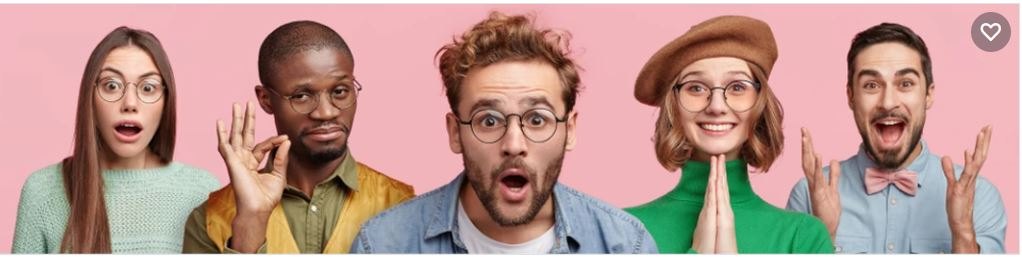

Faces Detected


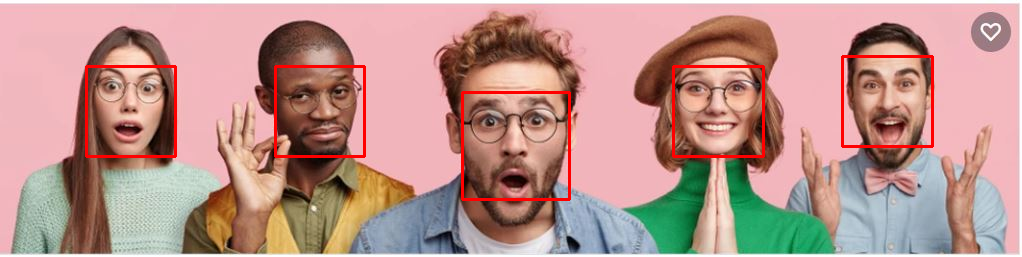

Current size:  (90, 90, 3)


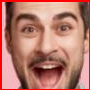

Resized to:  (48, 48, 3)


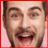

Current size:  (90, 90, 3)


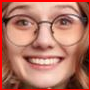

Resized to:  (48, 48, 3)


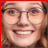

Current size:  (90, 89, 3)


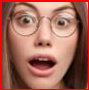

Resized to:  (48, 48, 3)


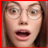

Current size:  (90, 89, 3)


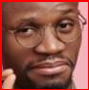

Resized to:  (48, 48, 3)


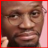

Current size:  (107, 107, 3)


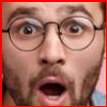

Resized to:  (48, 48, 3)


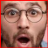

In [ ]:
def detect_faces(img):

  hog_detector=dlib.get_frontal_face_detector() #pretrained face recog model
  faces_hog=hog_detector(img,1)

  f1=[]
  for face in faces_hog:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y
    f1.append(img[y:y+h,x:x+w,:])
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)

  return faces_hog, f1, img

def face_and_emotion_detector(base_img):

  color_map = {0:, 1, 2, 3, 4, 5, 6}

  print('Original Image')
  cv2_imshow(base_img)

  faces, individual_faces, full_image_with_faces = detect_faces(base_img)
  print('Faces Detected')
  cv2_imshow(full_image_with_faces)

  dim = (48,48)
  # Calling the emotion detector for each face
  for i in range(len(individual_faces)):
    resized = np.empty((48,48,3))
    #current shape and face
    print('Current size: ', individual_faces[i].shape)
    cv2_imshow(individual_faces[i])

    # Resize to fit (48,48,3)
    for channel in range(3):
      resized[:,:,channel] = cv2.resize(individual_faces[i][:,:,channel], dim, interpolation = cv2.INTER_AREA)
    print('Resized to: ',resized.shape)
    cv2_imshow(resized)

    # Call Emotion detector
    load_model()
    a = predict()
    # Recreate Image with emojis

  return 

face_and_emotion_detector(cv2.imread('recog2.JPG'))

In [5]:
import dlib
import numpy as np
import cv2

In [6]:
os.listdir('checkpoints/final_model_weights.zip (Unzipped Files)/model/')

['checkpoint', '.index', '.data-00000-of-00001']

In [47]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Flatten, Dense, GlobalAvgPool2D, GlobalMaxPool2D, GlobalAveragePooling2D, GlobalMaxPooling2D, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet

Original Image


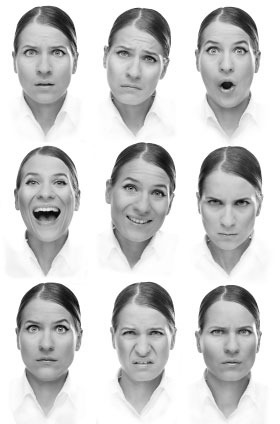

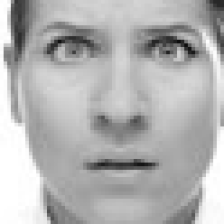

(0, 0, 255) 0


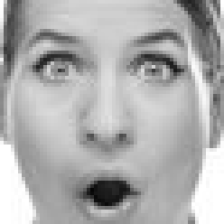

(255, 51, 204) 6


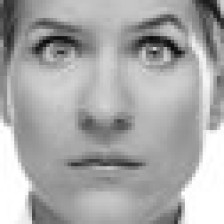

(0, 0, 255) 0


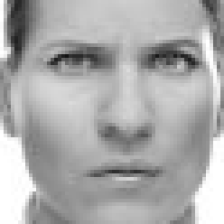

(0, 0, 255) 0


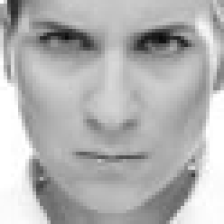

(0, 255, 0) 2


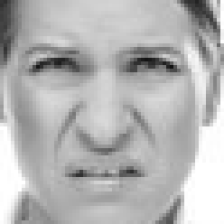

(0, 255, 0) 2


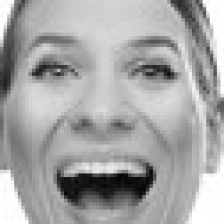

(255, 0, 204) 3


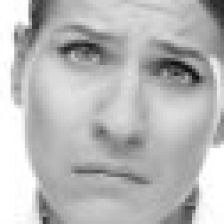

(255, 0, 0) 5


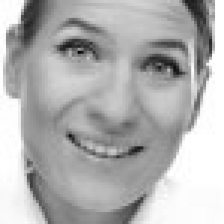

(0, 255, 255) 4


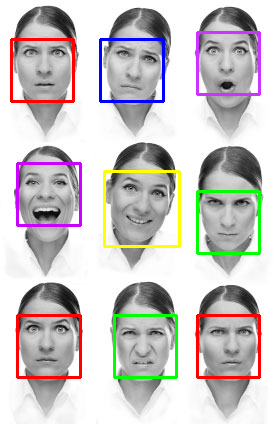

In [50]:
def load_model():
  mobile_net = MobileNet(
    input_shape = (224,224,3),
    include_top = False,
    weights = "imagenet",
    classes = 7)

  x = mobile_net.layers[-14].output
  global_pool = GlobalMaxPool2D(name="global_pool")(x)
  x = Dense(128, activation="relu", name="dense")(global_pool)
  x = Dropout(0.2)(x)
  out = Dense(7, activation="softmax", name="out_layer")(x)

  model = Model(inputs=mobile_net.input, outputs=out)
  return model

def detect_faces(img):

  hog_detector=dlib.get_frontal_face_detector() #pretrained face recog model
  faces_hog=hog_detector(img,1)
  return faces_hog

def face_and_emotion_detector(base_img):

  color_map = {0: (0, 0, 255),#Anger - Red 
               1: (255, 255, 0), #Contempt - Cyan 
               2: (0, 255, 0) , #Disgust - Green
               3: (255, 0, 204),  #Fear - Purple
               4: (0, 255, 255),  #Happy - Yellow
               5: (255, 0, 0),  #Sadness - Blue
               6: (255, 51, 204)}  #Surprise - Flourescent Pink
  dim = (224,224)

  print('Original Image')
  cv2_imshow(base_img)

  faces = detect_faces(base_img)

  #f1=[]

  for face in faces:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y
    #f1.append(img[y:y+h,x:x+w,:])
    individual_face = base_img[y:y+h,x:x+w,:]
  
    resized = np.empty((224,224,3))
    #current shape and face
    #print('Current size: ', individual_face.shape)
    #cv2_imshow(individual_face)

    # Resize to fit (224,224,3)
    for channel in range(3):
      resized[:,:,channel] = cv2.resize(individual_face[:,:,channel], dim, interpolation = cv2.INTER_AREA)
    #print('Resized to: ',resized.shape)
    #cv2_imshow(resized)

    resized =np.reshape(resized, (1,224,224,3))
    model = load_model()
    model.load_weights('checkpoints/model0.00015624999650754035.h5')
    
    prediction = np.argmax(np.round(model.predict(resized)))
    # Recreate Image with emojis
    color = color_map[prediction]
    cv2_imshow(resized[0])
    print(color, prediction)
    cv2.rectangle(base_img, (x,y), (x+w,y+h), color = color, thickness = 2)
    
  cv2_imshow(base_img)
  return 

image = cv2.imread('recog7.jpeg',0)
image = cv2.merge((image,image,image))
face_and_emotion_detector(image)